/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x

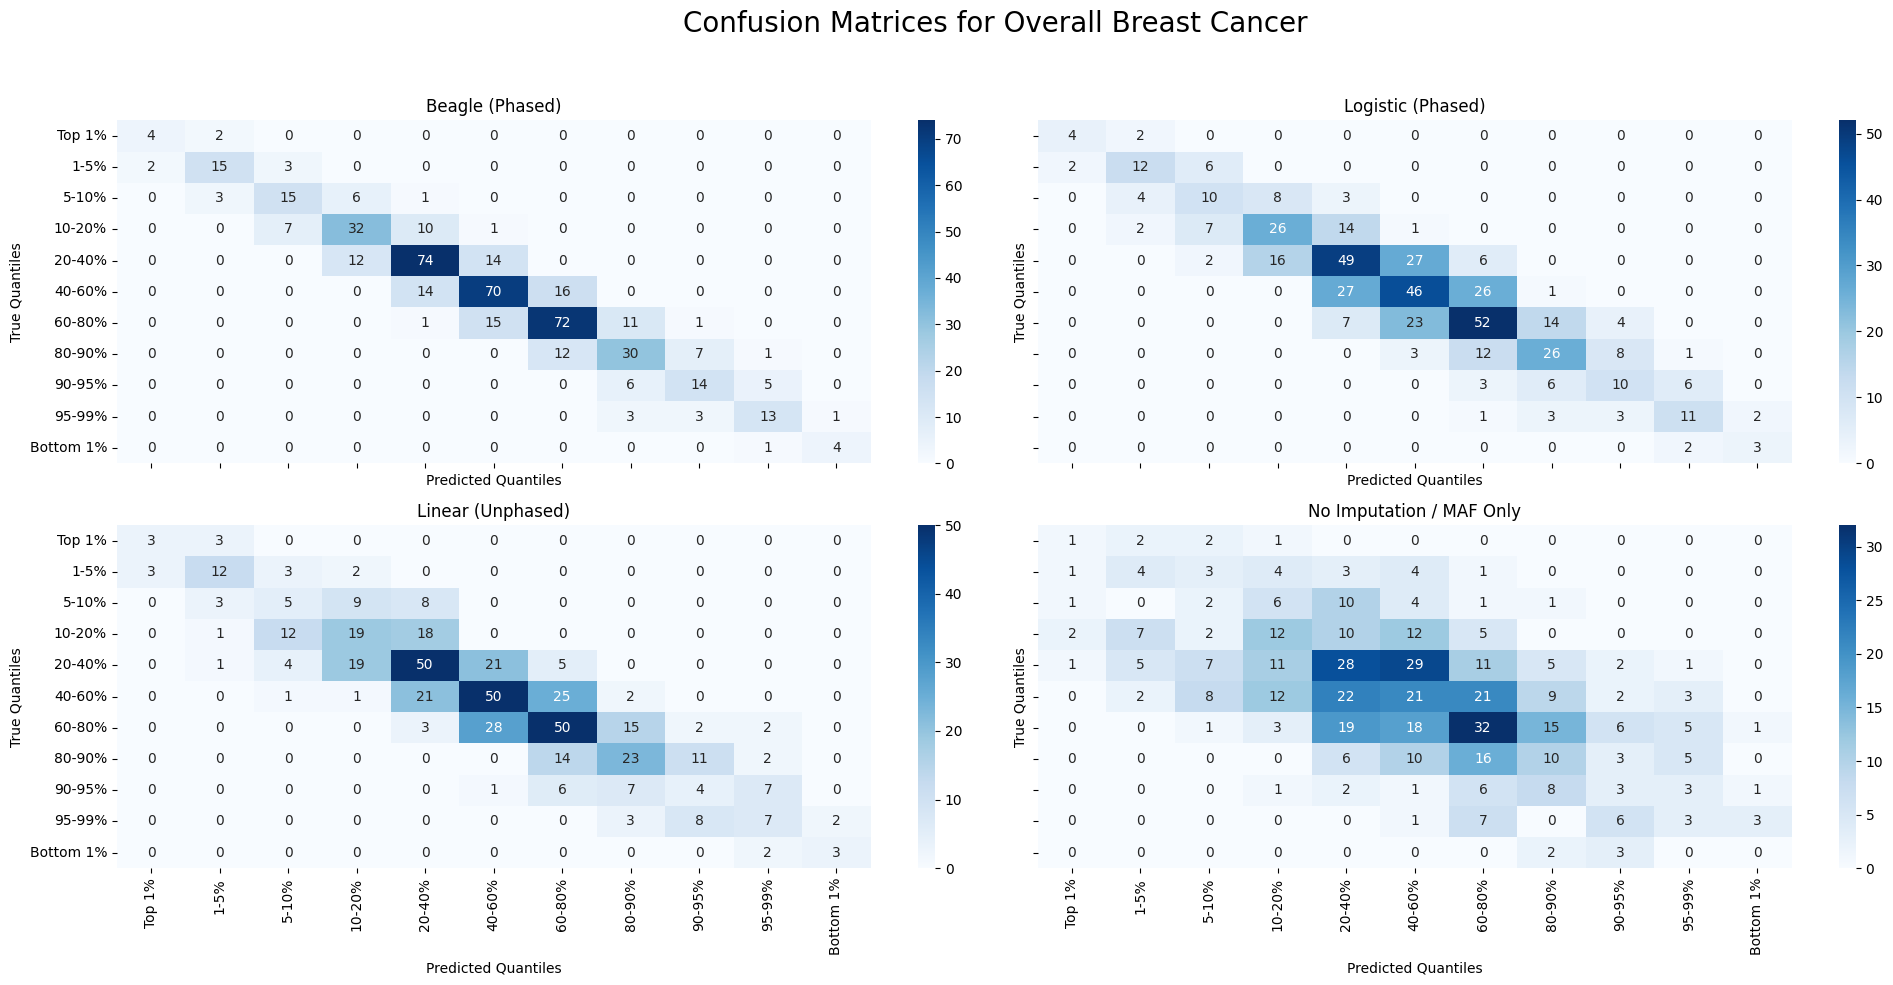

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x

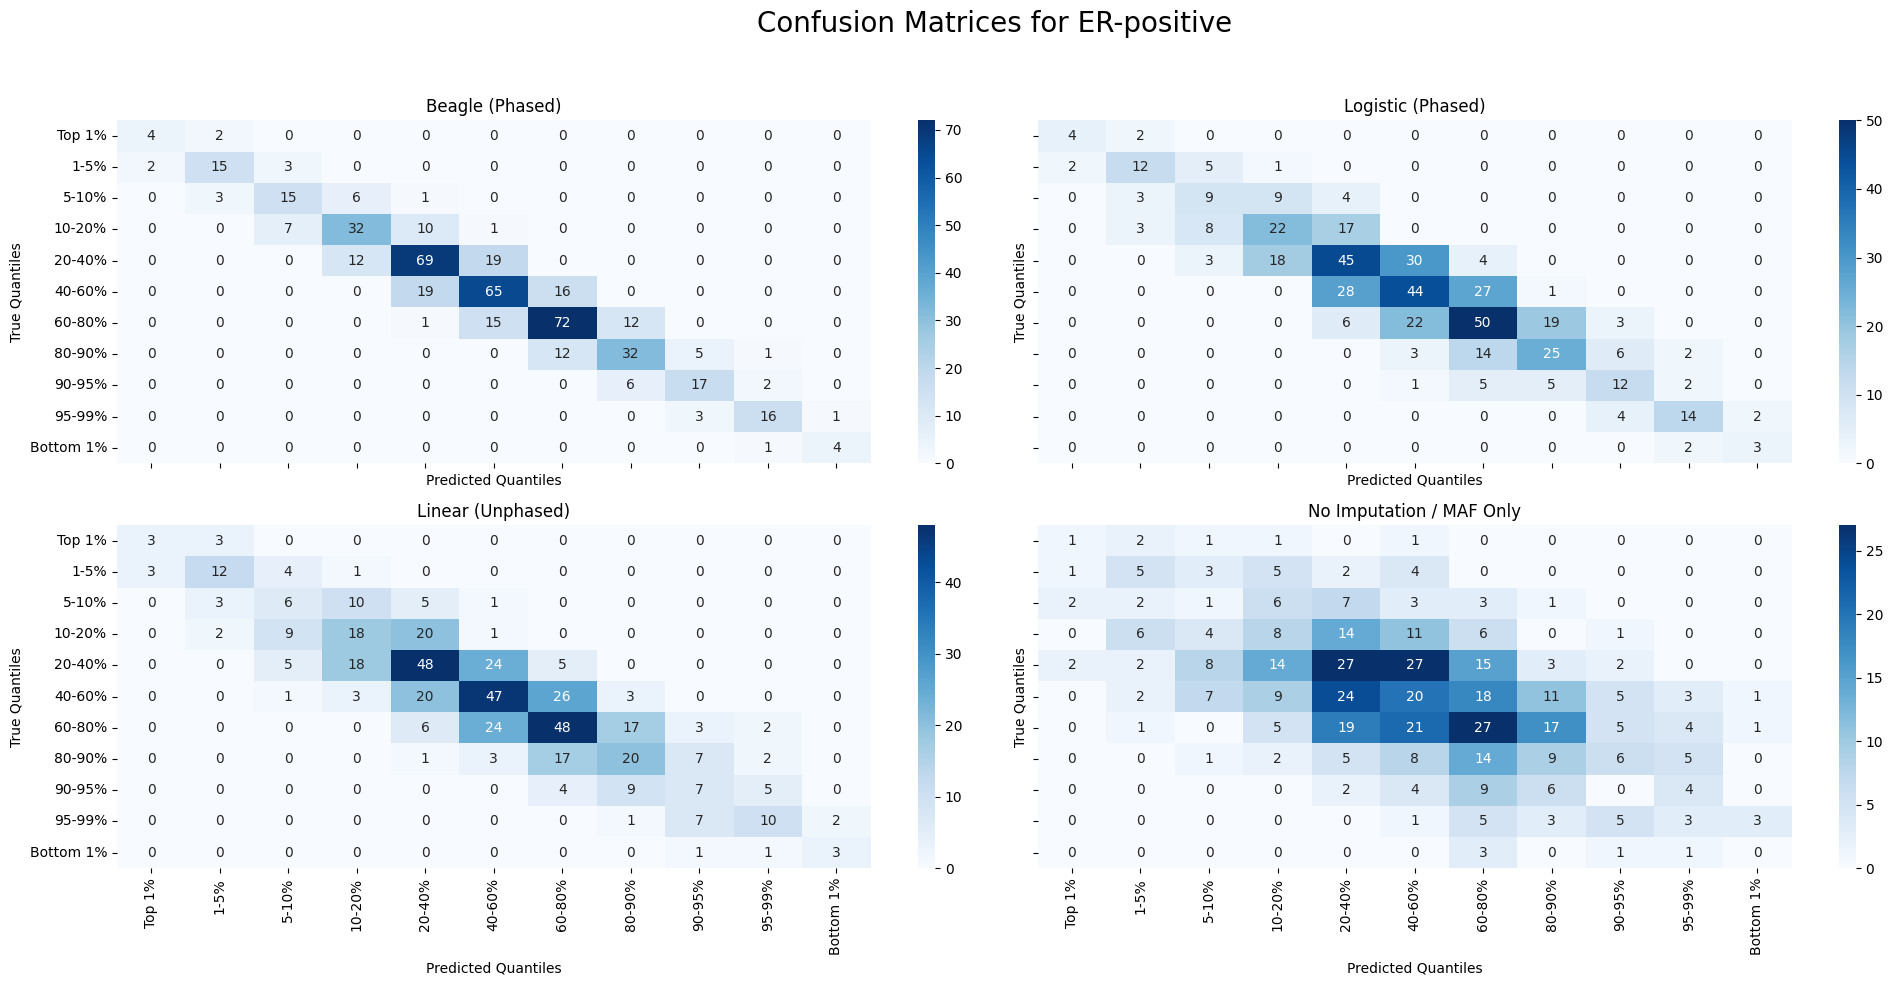

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x

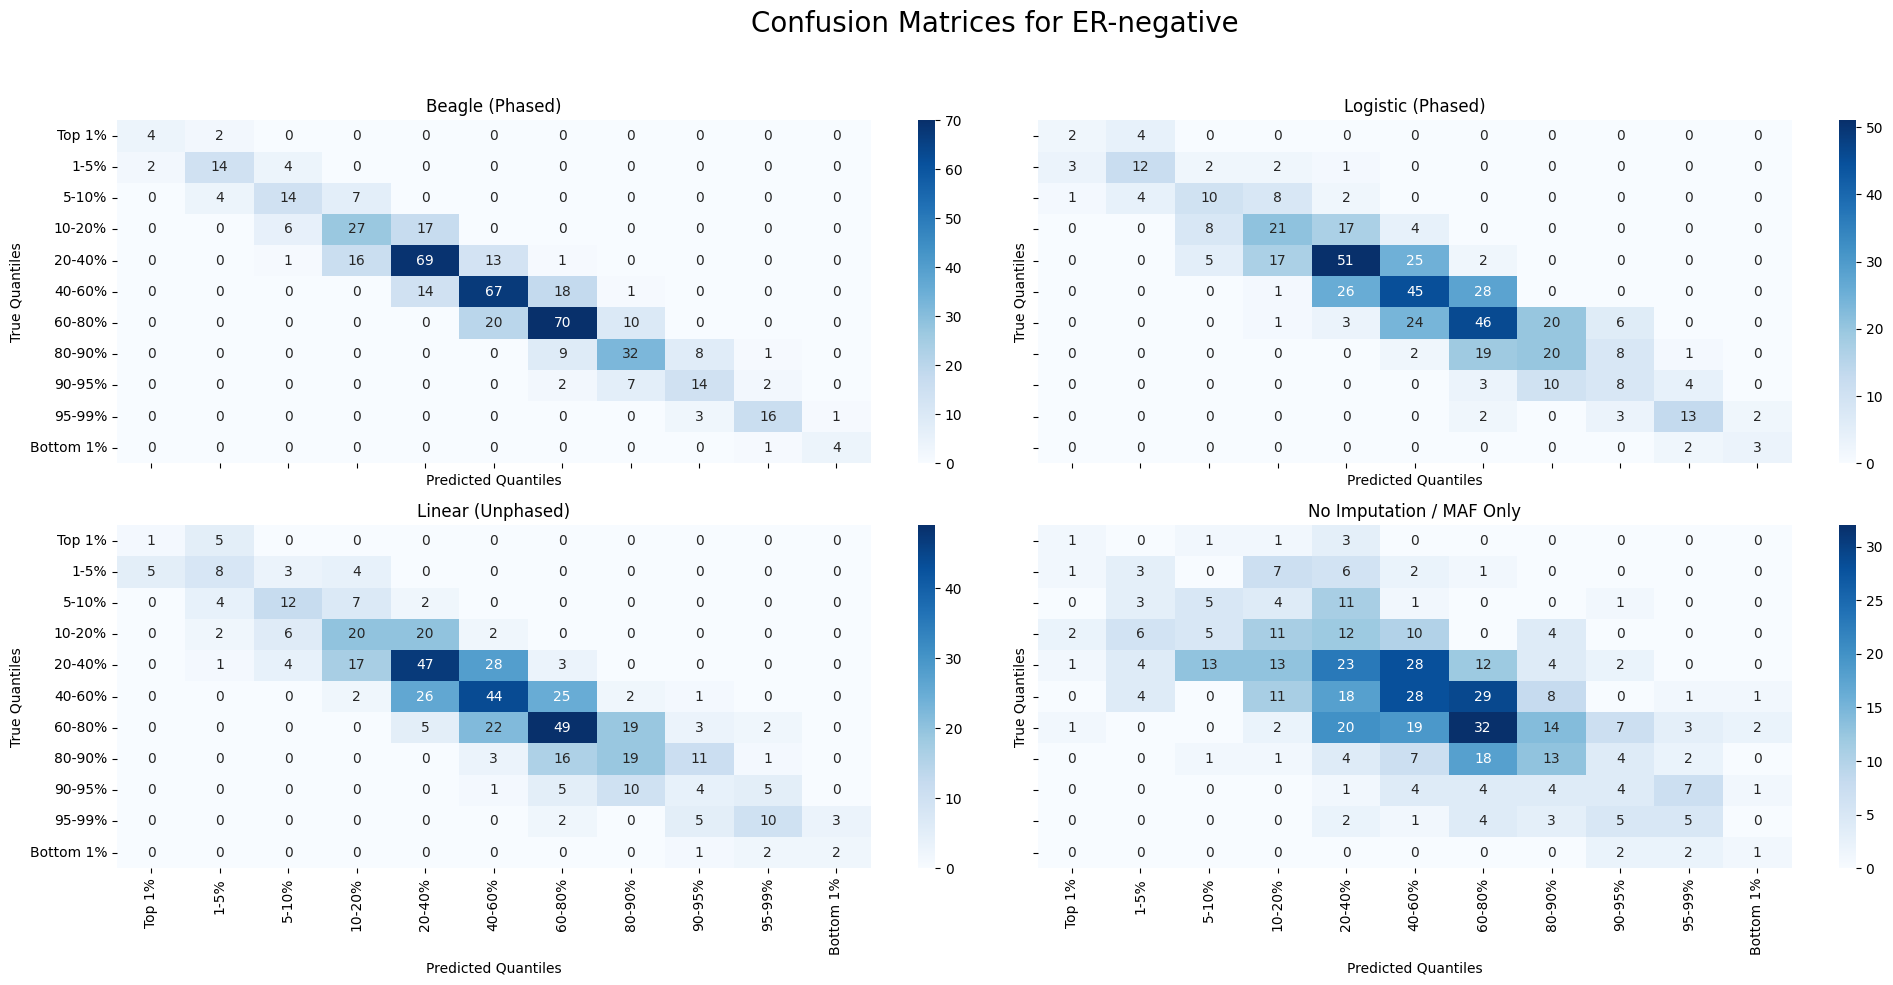

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x

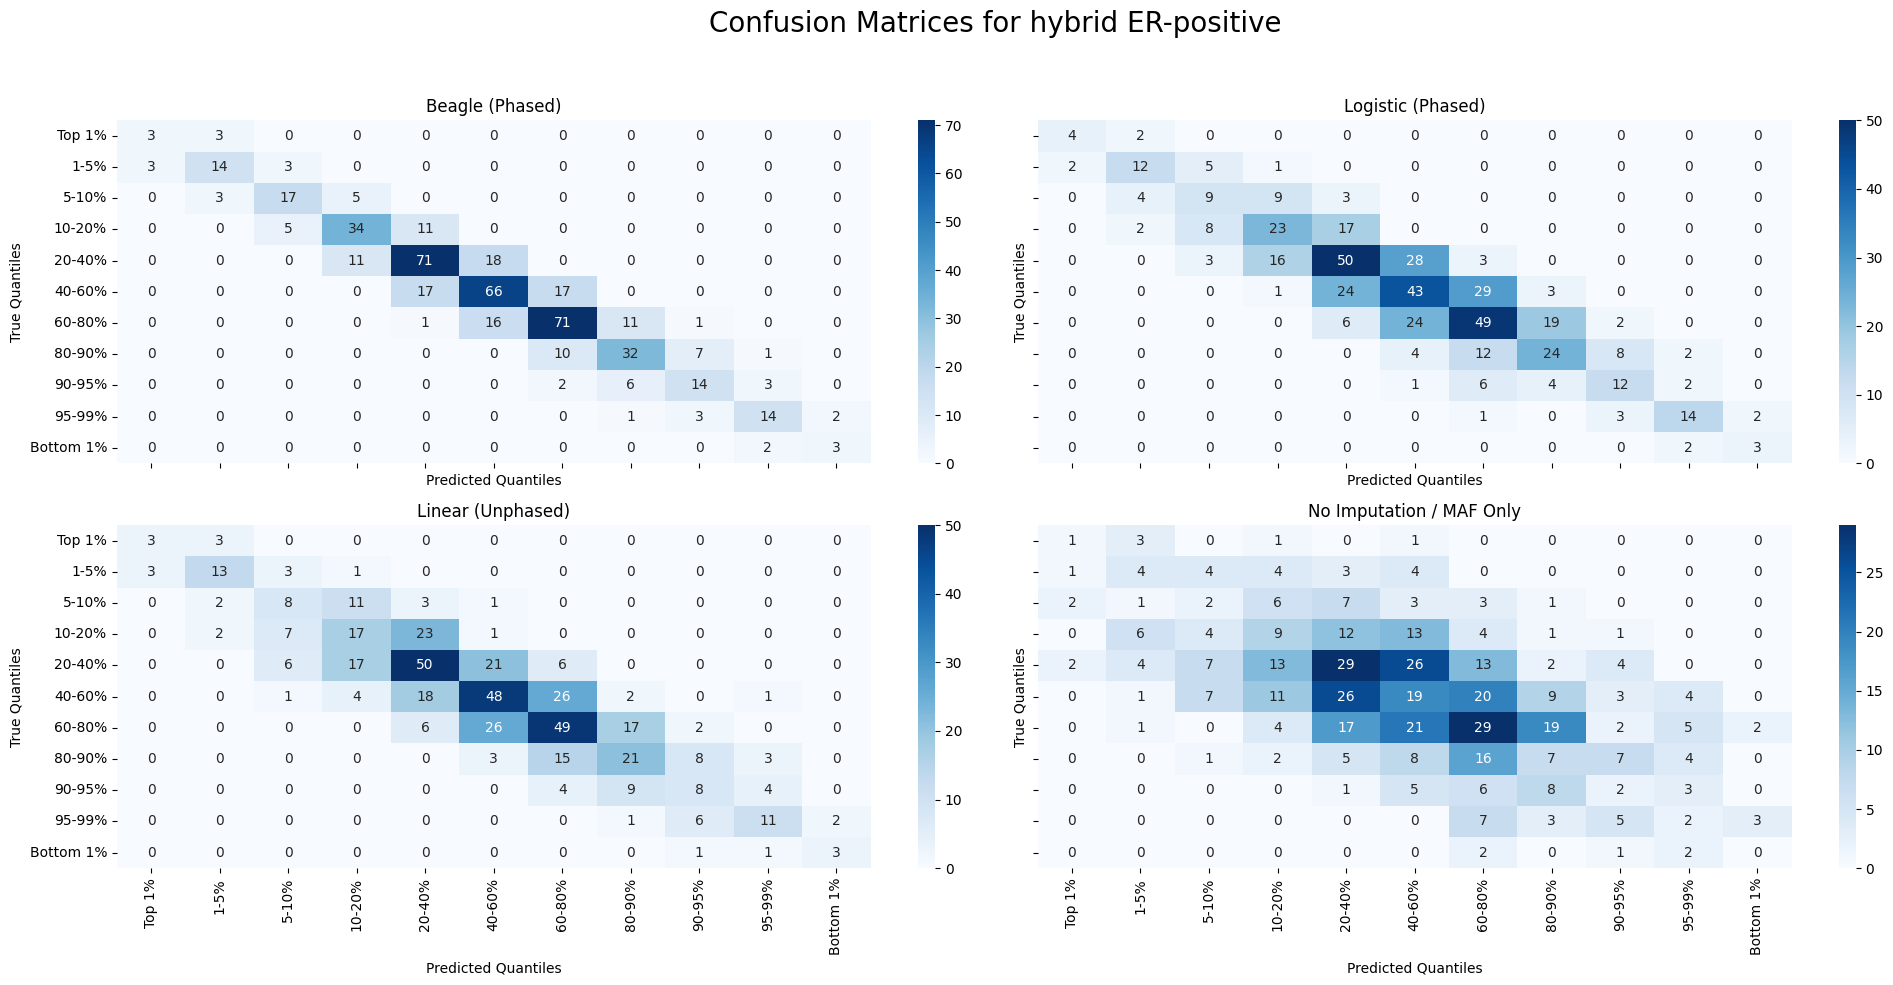

/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
/var/folders/yg/982c10113957_2gb06y92y35sx509h/T/ipykernel_1144/3707245263.py:40: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x

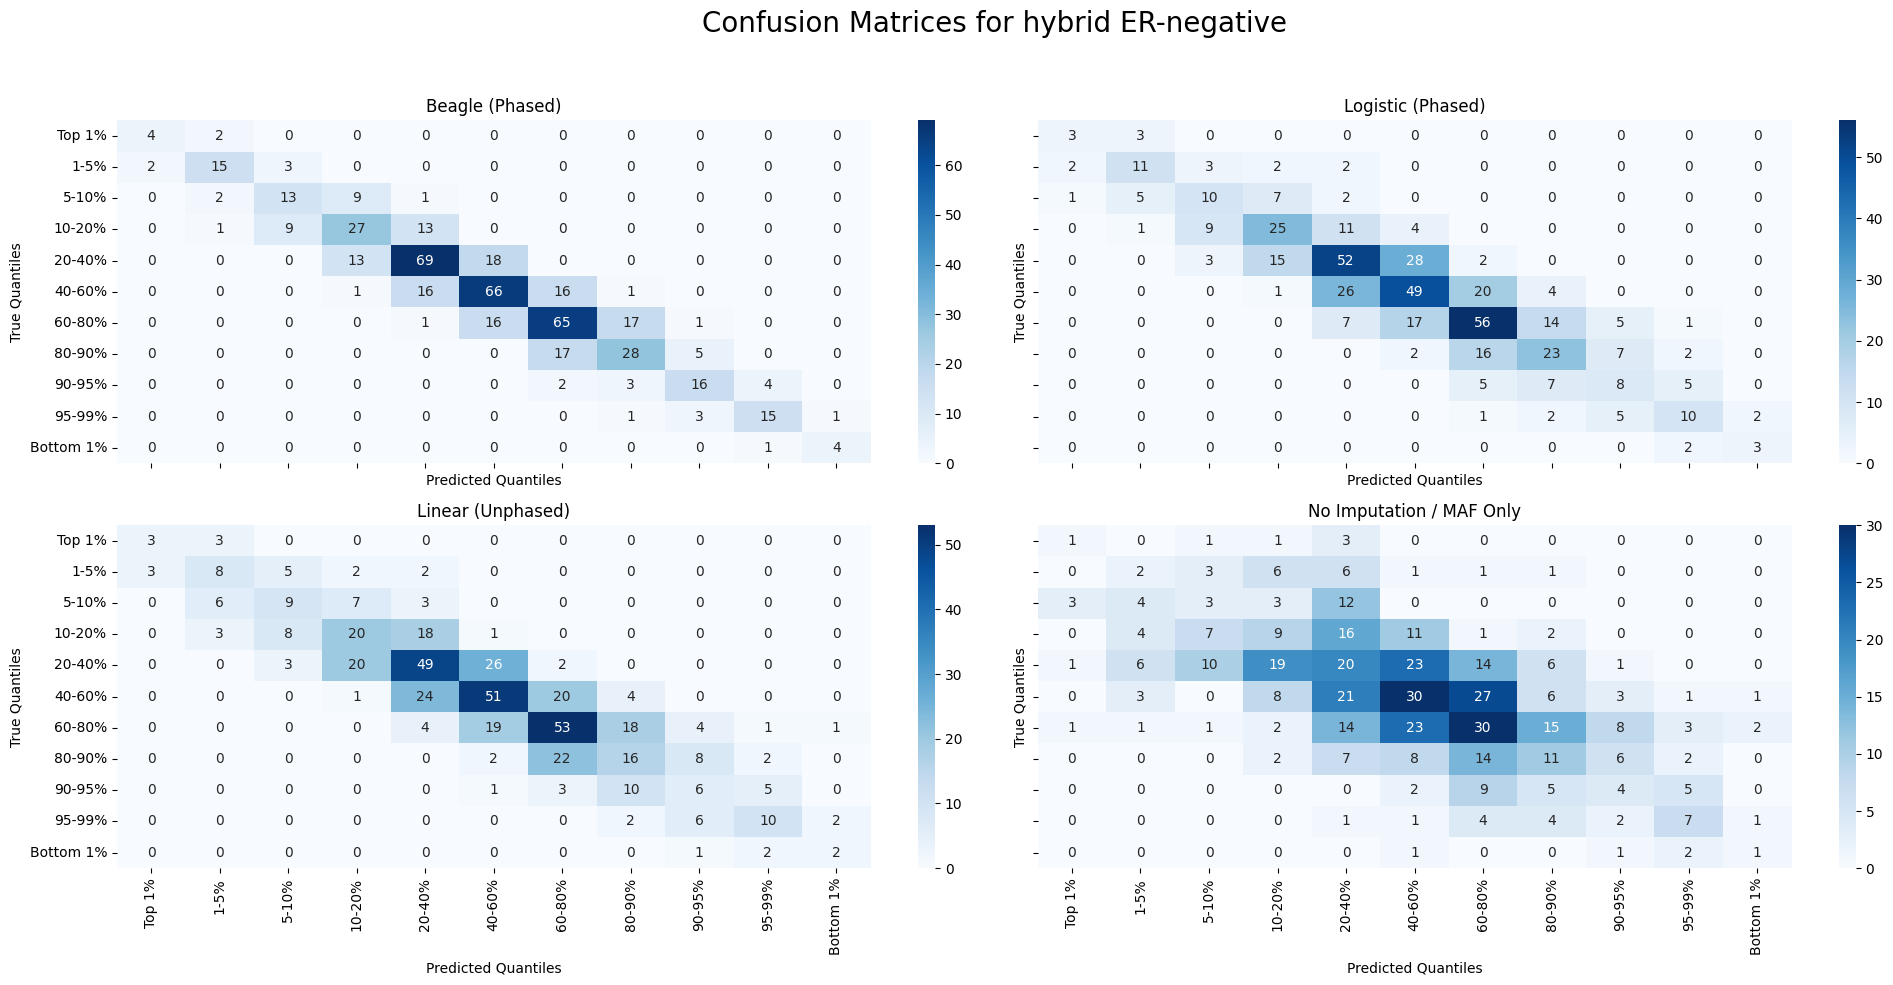

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Load the PRS313 data
prs313_df = pd.read_excel('../../../Data/PRS313_with_23andMe.xlsx')

# Format PRS313 SNP names to match the genotype data format
prs313_df['SNP'] = prs313_df.apply(lambda row: f"{row['Chromosome']}:{row['Positionb']}:{row['Reference Allele']}:{row['Effect Allele']}", axis=1)

# Function to format SNP names and sort by SampleID
def format_snp_names_and_sort_by_sampleID(df):
    df.columns = ['SampleID'] + [col.split('_PRS313')[0].replace('chr', '').replace('_', ':') for col in df.columns[1:]]
    df = df.sort_values(by=['SampleID'])
    df = df.reset_index(drop=True)
    return df

# Merge the true labels and predictions with the PRS313 data
def merge_with_prs313(df, prs313_df, true_labels_df):
    df = df.melt(id_vars=["SampleID"], var_name="SNP", value_name="Dosage")
    df['Dosage'] = df['Dosage'].round()  # Round the dosage values
    
    # Identify known SNPs present in 23andMe
    known_snps = prs313_df[prs313_df['in_23andMe'] == True]['SNP']
    
    # Prepare the known dosage dataframe
    known_df = true_labels_df.melt(id_vars=["SampleID"], var_name="SNP", value_name="Known_Dosage")
    df = pd.merge(df, known_df, on=["SampleID", "SNP"], how="left")
    
    df['Dosage'] = np.where(df['SNP'].isin(known_snps), df['Known_Dosage'], df['Dosage'])
    df = df.drop(columns=['Known_Dosage'])

    merged_df = pd.merge(df, prs313_df, on="SNP")
    return merged_df

# Calculate PRS
def calculate_prs(df, phenotype):
    prs_df = df.groupby('SampleID').apply(lambda x: np.sum(x['Dosage'] * x[phenotype]))
    return prs_df.reset_index(name=phenotype + '_PRS')

# Normalize PRS scores
def normalize_prs(prs_scores, true_prs):
    mean_prs = np.mean(true_prs)
    std_prs = np.std(true_prs)
    normalized_prs = (prs_scores - mean_prs) / std_prs
    return normalized_prs

# Assign quantiles
def assign_quantiles(prs_scores):
    quantiles = [0, 0.01, 0.05, 0.10, 0.20, 0.40, 0.60, 0.80, 0.90, 0.95, 0.99, 1.0]  # Quantiles as specified
    return pd.cut(prs_scores, bins=np.percentile(prs_scores, [0, 1, 5, 10, 20, 40, 60, 80, 90, 95, 99, 100]), labels=False, include_lowest=True)

# Create confusion matrix
def create_confusion_matrix(true_quantiles, pred_quantiles):
    cm = confusion_matrix(true_quantiles, pred_quantiles)
    return cm

# Plot confusion matrix
def plot_confusion_matrix(cm, labels, title, ax):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, ax=ax)
    ax.set_xlabel('Predicted Quantiles')
    ax.set_ylabel('True Quantiles')
    ax.set_title(title)

# Main function to process and create confusion matrix
def process_and_create_confusion_matrix(true_labels_df_path, prs313_df, imputed_genotypes_paths, phenotypes):
    # Load the true labels
    true_labels_df = pd.read_csv(true_labels_df_path)
    true_labels_df = format_snp_names_and_sort_by_sampleID(true_labels_df)

    # Merge true labels with PRS313
    true_merged = merge_with_prs313(true_labels_df, prs313_df, true_labels_df)

    # Calculate true PRS
    true_prs = true_merged[['SampleID']].drop_duplicates().reset_index(drop=True)
    for p in phenotypes:
        true_prs = true_prs.merge(calculate_prs(true_merged, p), on='SampleID')
    true_prs.columns = ['SampleID'] + ['True_' + p + '_PRS' for p in phenotypes]

    quantile_labels = ['Top 1%', '1-5%', '5-10%', '10-20%', '20-40%', '40-60%', '60-80%', '80-90%', '90-95%', '95-99%', 'Bottom 1%']

    # Create and plot confusion matrices for each phenotype in separate figures
    for p in phenotypes:
        n_models = len(imputed_genotypes_paths)
        n_cols = (n_models + 1) // 2
        fig, axes = plt.subplots(2, n_cols, figsize=(20, 10), sharex=True, sharey=True)
        fig.suptitle(f'Confusion Matrices for {p}', fontsize=20)
        
        axes = axes.flatten()
        
        for j, (model_name, path) in enumerate(imputed_genotypes_paths.items()):
            df = pd.read_csv(path)
            df = format_snp_names_and_sort_by_sampleID(df)
            merged_df = merge_with_prs313(df, prs313_df, true_labels_df)
            
            model_prs = merged_df[['SampleID']].drop_duplicates().reset_index(drop=True)
            model_prs = model_prs.merge(calculate_prs(merged_df, p), on='SampleID')
            model_prs.columns = ['SampleID'] + [model_name + '_' + p + '_PRS']

            merged_prs = true_prs.copy()
            merged_prs = merged_prs.merge(model_prs, on='SampleID')

            # Normalize PRS scores
            merged_prs['Normalized_True_' + p + '_PRS'] = normalize_prs(merged_prs['True_' + p + '_PRS'], merged_prs['True_' + p + '_PRS'])
            merged_prs['Normalized_' + model_name + '_' + p + '_PRS'] = normalize_prs(merged_prs[model_name + '_' + p + '_PRS'], merged_prs['True_' + p + '_PRS'])

            # Assign quantiles
            merged_prs['True_' + p + '_Quantile'] = assign_quantiles(merged_prs['Normalized_True_' + p + '_PRS'])
            merged_prs[model_name + '_' + p + '_Quantile'] = assign_quantiles(merged_prs['Normalized_' + model_name + '_' + p + '_PRS'])

            # Create and plot confusion matrix
            cm = create_confusion_matrix(merged_prs['True_' + p + '_Quantile'], merged_prs[model_name + '_' + p + '_Quantile'])
            plot_confusion_matrix(cm, quantile_labels, f'{model_name}', axes[j])

        for ax in axes[len(imputed_genotypes_paths):]:
            ax.remove()
        
        plt.tight_layout(rect=[0, 0, 1, 0.95])
        plt.show()

# Example usage
imputed_genotypes_paths = {
    'Beagle (Phased)': '../../../Data/model_results_unphased_all_PRS/beagle/combined_imputed_dosages.csv',
    'Logistic (Phased)': '../../../Data/model_results/logistic_regression/all_predictions.csv',
    'Linear (Unphased)': '../../../Data/model_results_unphased_all_PRS/linear_regression/all_predictions.csv',
    'No Imputation / MAF Only': './all_chr_missing_values_y_test.csv',
    # 'MAF Only': './all_chr_simple_imputation_values_y_test.csv',
}

phenotypes = ['Overall Breast Cancer', 'ER-positive', 'ER-negative', 'hybrid ER-positive', 'hybrid ER-negative']

process_and_create_confusion_matrix('../../../scripts/Python/benchmarking/all_chr_true_labels_y_test.csv', prs313_df, imputed_genotypes_paths, phenotypes)
